In [3]:
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import loompy
import anndata

fn_h5ad = '/home/yike/phd/dengue/data/mergedata_20200930_high_quality.h5ad'
adata = anndata.read_h5ad(fn_h5ad)

In [4]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
adata = adata[adata.obs['cell_quality'] == 'high']

adata.obs['dataset'] = adata.obs['platform'].replace({
    '10X': 'child',
    'plate': 'adult'
})
adata.obs['sick'] = adata.obs['Condition'].replace({
    'S_dengue': 'sick',
    'dengue': 'sick',
    'DWS': 'sick'
})
sc.pp.normalize_total(adata, target_sum=1e6) #normalize data to CPM (counts per million)
sc.pp.log1p(adata)

Trying to set attribute `.obs` of view, copying.


In [5]:
# cmap: bwr, viridis_r, Blues, RdBu_r, viridis
def S_dengue_vs_dengue(adata, cond1, cond2, gb, inters):
    adata_children = adata[adata.obs['dataset'] == 'child']
    adata_adults = adata[adata.obs['dataset'] == 'adult']

    conditions = list(adata.obs['Condition'].astype('category').cat.categories)
    datasets = list(adata.obs['dataset'].astype('category').cat.categories)
    sicks = list(adata.obs['sick'].astype('category').cat.categories)
    cell_types = ['B_cells', 'Monocytes', 'NK_cells', 'Plasmablasts', 'T_cells', 'cDCs', 'pDCs']

    from collections import defaultdict
    adata_dic = {}

    for dataset in datasets:                                                                                                                          
        for condition in conditions:
            adata_dic[(condition, dataset)] = adata[adata.obs['Condition'] == condition][adata[adata.obs['Condition'] == condition].obs['dataset'] == dataset]
        for sick in sicks:
            adata_dic[(sick, dataset)] = adata[adata.obs['sick'] == sick][adata[adata.obs['sick'] == sick].obs['dataset'] == dataset]
        for cell_type in cell_types:
            adata_dic[(cell_type, dataset)] = adata[adata.obs['cell_type'] == cell_type][adata[adata.obs['cell_type'] == cell_type].obs['dataset'] == dataset]
    
    fig,axs = plt.subplots(2, 2, figsize=(10,8), gridspec_kw={'wspace':-0.4}, sharex=True, facecolor='white', dpi=300, sharey=True)
    for age, ax_row in zip(['child', 'adult'], axs):
        for cond, ax in zip([cond1, cond2], ax_row):
            sc.pl.dotplot(adata_dic[(cond, age)], inters, groupby=gb, ax=ax, show=False, cmap='RdBu_r', vmin=0, vmax=4 + 0.5 *(age=='adult'), dot_min=0, dot_max=0.6)
            ax.set_title(cond + ' ' + age, fontsize=15, y=0.8, loc='left')
            
    axes = fig.get_axes()
    #del axes[6:7], axes[14:15]
    axes[6].remove()
    axes[7].remove()
    axes[14].remove()
    axes[15].remove()
    fig.tight_layout()
    return {'figure':fig, 'subplots':axs}

/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'dataset' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'sick' as categorical
/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'dataset' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'sick' as categorical
/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'dataset' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'sick' as categorical
/

{'figure': <Figure size 3000x2400 with 16 Axes>,
 'subplots': array([[<AxesSubplot:title={'left':'S_dengue child'}>,
         <AxesSubplot:title={'left':'dengue child'}>],
        [<AxesSubplot:title={'left':'S_dengue adult'}>,
         <AxesSubplot:title={'left':'dengue adult'}>]], dtype=object)}

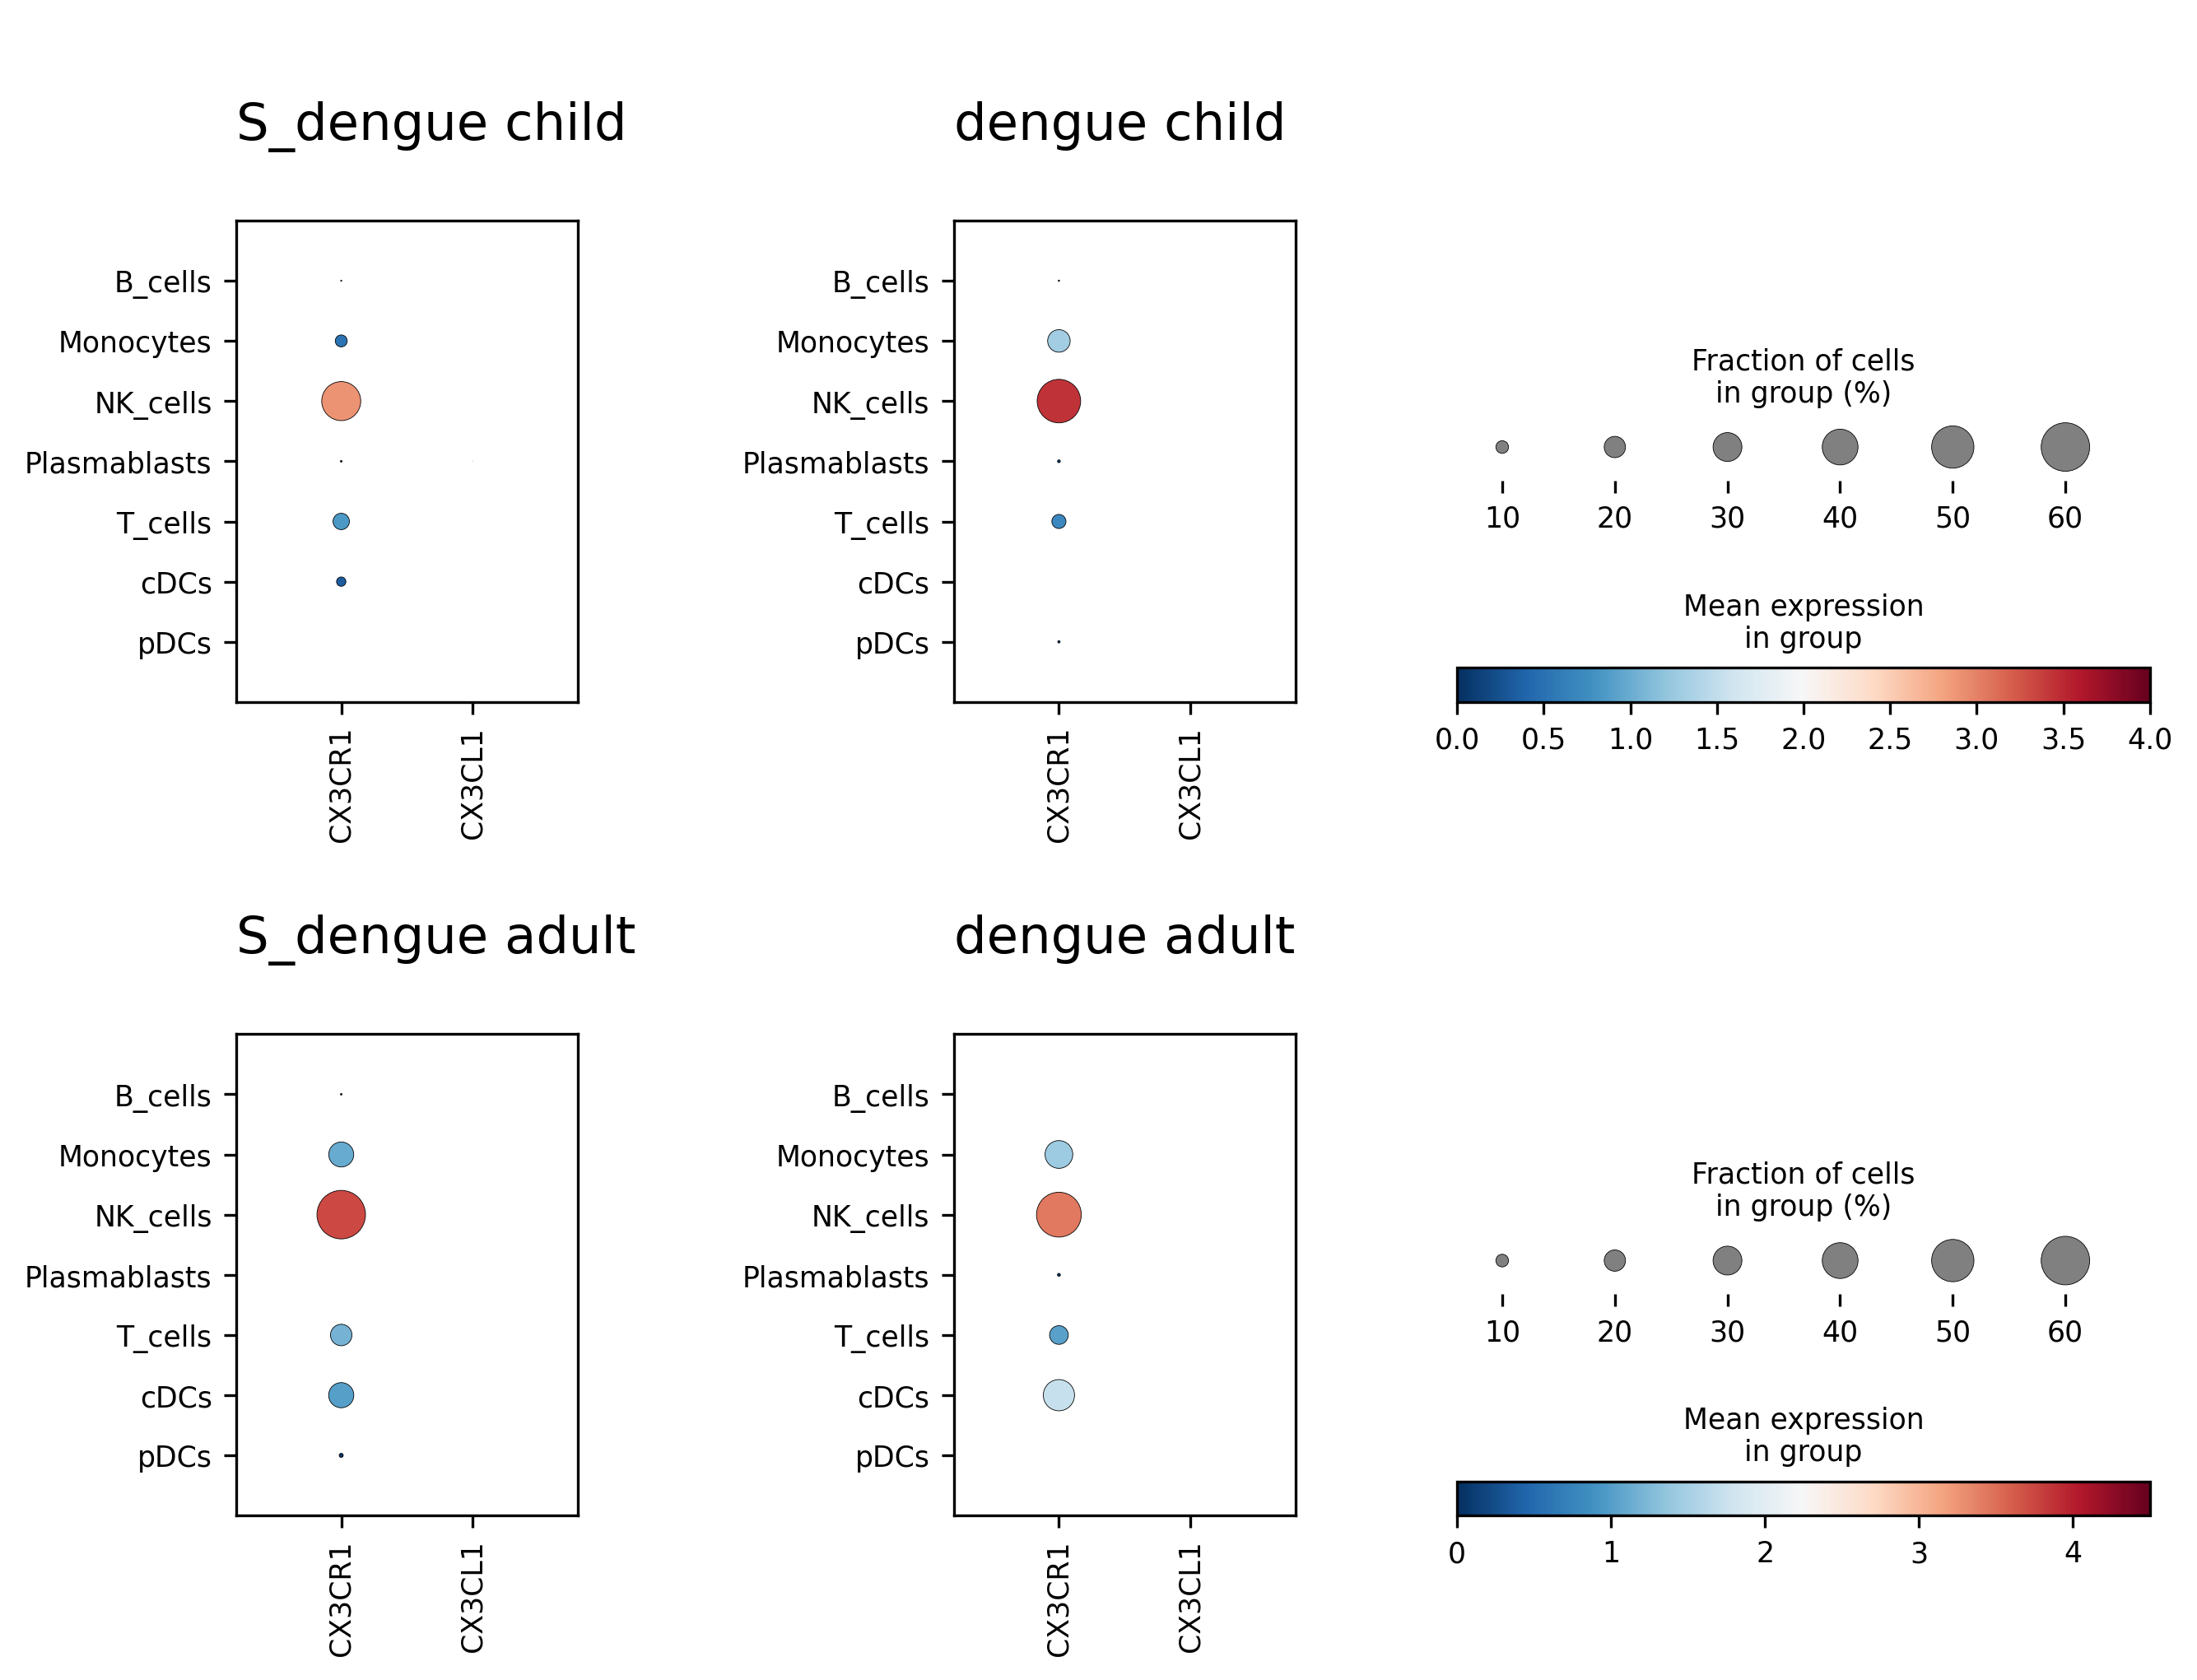

In [6]:
S_dengue_vs_dengue(adata, 'S_dengue', 'dengue', 'cell_type', [ 'CX3CR1', 'CX3CL1'])

In [5]:
new = pd.read_csv('/home/yike/phd/dengue/data/mergedata_20210304_obs.tsv', sep='\t')

In [6]:
new['cell_subtype'].value_counts()

unknown                77555
NK                     27688
naive_B                13665
CD4+_T                 10599
Classical               5822
CD8+_T_effector         4619
S100A4_B                4426
CD8+_T_naive            2915
Classical_CD163+        2553
non_Classical           2318
memory_B                1773
doublets                1501
non_Classical_Macro     1037
Classical_CCL3+          934
Classical_ISG            400
Name: cell_subtype, dtype: int64